In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn # so we don't need to type the whole thing...

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [6]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [7]:
y = 2*X + 1 + e

In [8]:
y.shape

torch.Size([50, 1])

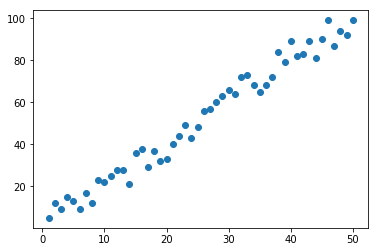

In [9]:
# We need to convert our tensors to numpy arrays to plot them
plt.scatter(X.numpy(), y.numpy())

In [10]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [11]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [12]:
torch.manual_seed(59)
model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [13]:
# Find out what our parameters are
for name,param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [14]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [15]:
x1 = np.linspace(0.0,50.0,50)

In [16]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [17]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [18]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

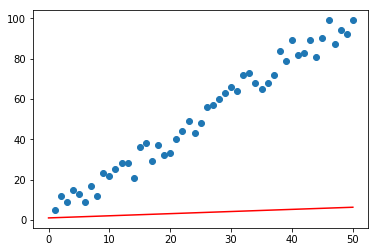

In [19]:
plt.scatter(X.numpy(), y.numpy()) # true values
plt.plot(x1, y1, 'r') # guesses

In [20]:
# Define our loss function
criterion = nn.MSELoss()

Now it's time to set an **optimization**:
- We'll use stochastic gradient descent with an applied learning rate 
- The learning rate tells the optimizer how much to adjust each param on the next round of calculations

In [21]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

Now it's time to **train** the model.

In [22]:
epochs = 50
losses = []

for i in range(epochs):
    # PREDICT ON THE FORWARD PASS
    y_pred = model.forward(X)

    # CALCULATE OUR LOSS (ERROR)
    loss = criterion(y_pred,y)

    # RECORD THAT ERROR
    losses.append(loss)

    print(f"Epoch {i + 1}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")

    # RESET THE STORED RADIANT FOR EACH EPOCH SO THAT THEY DON'T COMPOUND
    optimizer.zero_grad()

    # BACKPROPAGATION
    loss.backward()
    optimizer.step()

Epoch 1, loss: 3057.216796875, weight: 0.10597813129425049, bias: 0.9637961387634277
Epoch 2, loss: 1588.531005859375, weight: 3.334900379180908, bias: 1.0604636669158936
Epoch 3, loss: 830.3001098632812, weight: 1.0148327350616455, bias: 0.9922627806663513
Epoch 4, loss: 438.8524169921875, weight: 2.6817996501922607, bias: 1.0425218343734741
Epoch 5, loss: 236.7615203857422, weight: 1.4840211868286133, bias: 1.0076650381088257
Epoch 6, loss: 132.4291229248047, weight: 2.3446059226989746, bias: 1.0339646339416504
Epoch 7, loss: 78.56572723388672, weight: 1.7262253761291504, bias: 1.0163217782974243
Epoch 8, loss: 50.75775909423828, weight: 2.170504093170166, bias: 1.0302516222000122
Epoch 9, loss: 36.4012565612793, weight: 1.851245641708374, bias: 1.0214954614639282
Epoch 10, loss: 28.989227294921875, weight: 2.0806007385253906, bias: 1.029038906097412
Epoch 11, loss: 25.162382125854492, weight: 1.9157683849334717, bias: 1.0248701572418213
Epoch 12, loss: 23.186473846435547, weight: 2.

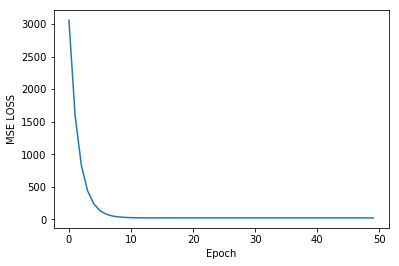

In [24]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch');

In [25]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [26]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

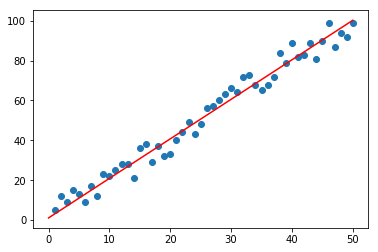

In [27]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r');